In [2]:
!sudo apt-get install -y fonts-nanum > /dev/null
!sudo fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null
# 런타임 재시작

In [1]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [2]:
import pandas as pd

남북한 발전전력량

In [ ]:
df = pd.read_excel('남북한발전전력량.xlsx', engine='openpyxl',
                   convert_float=True)
df = df.loc[5:9] # 북한 데이터만 추출

In [6]:
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

In [ ]:
# 증감율(변동율 계산)
df = df.rename(columns={'합계':'총발전량'})
df['총발전량-1년'] = df['총발전량'].shift(1)
df['증감율'] = (df['총발전량'] / df['총발전량-1년'] -1) * 100
df

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


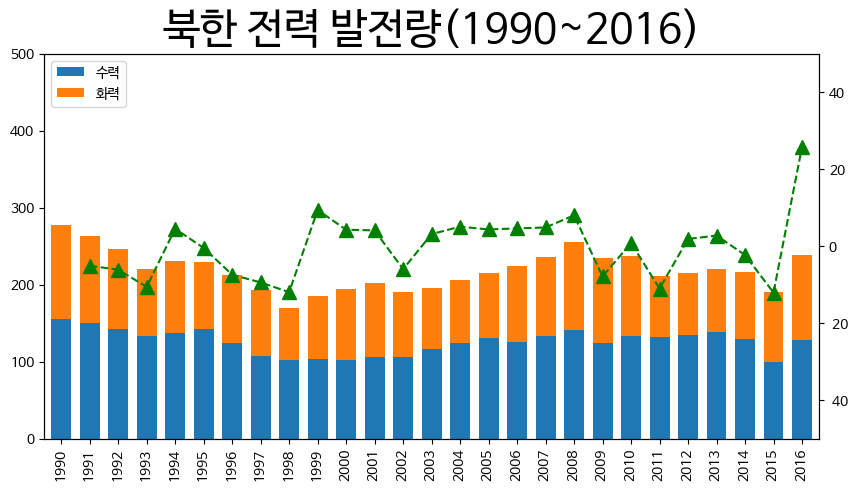

In [12]:
# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(10,5), width=0.7,
                          stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls="--", marker= "^", markersize=10,
         color='green', label='전년대비 증감율(%)')
ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)
plt.title('북한 전력 발전량(1990~2016)', size=30)
ax1.legend(loc='upper left')
plt.show()

mpg

In [14]:
df = pd.read_csv("auto-mpg.csv", header=None) # 컬럼이 없는 데이터이므로 hearder를 0으로 가져온다.
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'model year',
              'origin', 'name']

In [ ]:
# 연비(mpg)열에 대한 히스토 그램 그리기
df['mpg'].plot(kind='hist',  bins=10, color='coral', figsize=(10,5))
plt.title('histogram')
plt.show()

In [ ]:
# 산점도
df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=15 , figsize=(10,5))
plt.title('scatter plot - mpg vs. weight')
plt.show()

In [ ]:
#버블차트 cylinders의 상대적 비율을 계산
cylinder_size = df.cylinders / df.cylinders.max() * 500
# 3개변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral',
        s=cylinder_size, alpha=0.3, figsize=(10,5))
plt.title('scatter plot - mpg vs. weight-clylinders')
plt.show()

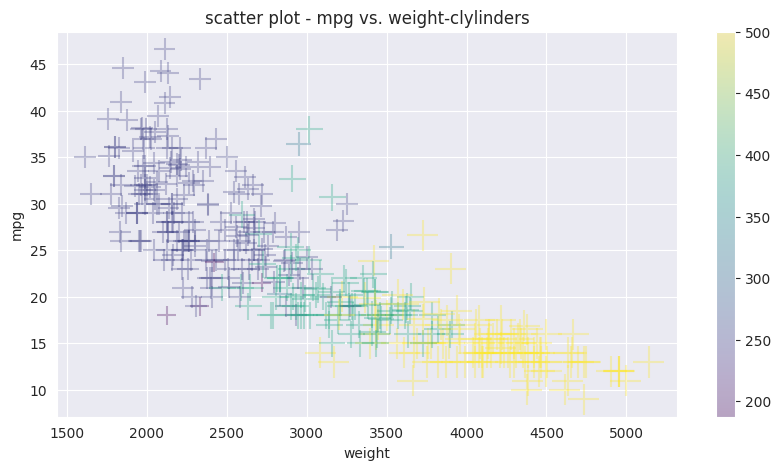

In [61]:
#버블차트 cylinders의 상대적 비율을 계산 cmap 포함
cylinder_size = df.cylinders / df.cylinders.max() * 500
# 3개변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c=cylinder_size,
        cmap = 'viridis',
        marker = '+', s=cylinder_size, alpha=0.3, figsize=(10,5))
plt.title('scatter plot - mpg vs. weight-clylinders')
plt.savefig("scatter.png")
# 투명한 배경 형태로 저장하고 싶을때
plt.savefig("scatter_transparent.png", transparent=True)
plt.show()

In [ ]:
# origin
df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin)

In [ ]:
# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JP']
print(df_origin)

In [ ]:
# 파이차트 그리기 count 열 데이터 사용
df_origin['count'].plot(kind='pie',
                        figsize=(7,5),
                        autopct="%1.1f%%", # 퍼센트 % 표시
                        startangle = 90, # 파이 조각을 나누는 시작점(각도)
                        colors = ['chocolate', 'bisque', 'cadetblue'] # 파이색상
                        )
plt.title('Model Origin', size=10)
plt.axis('equal')  # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels= df_origin.index, loc='upper right')
plt.show()

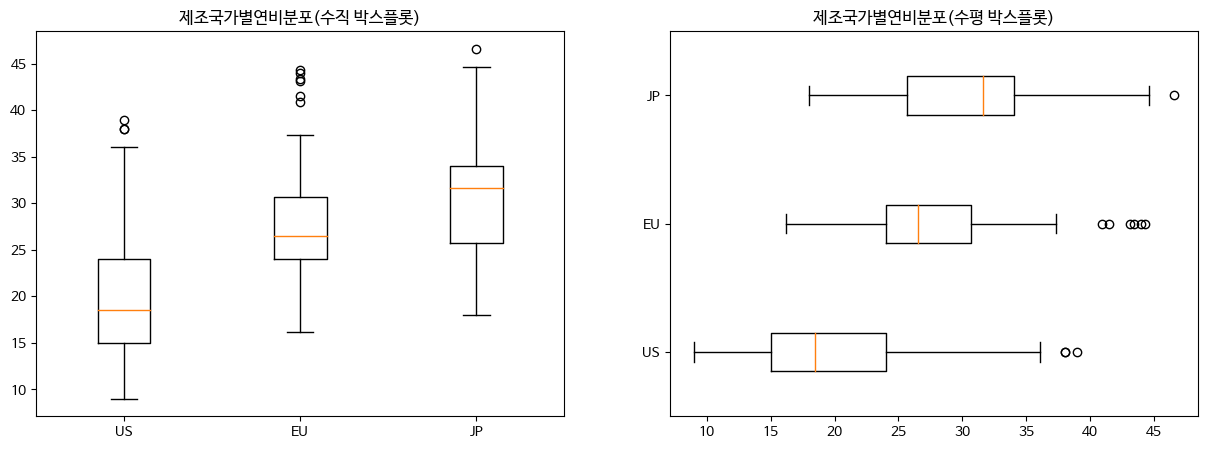

In [53]:
# 그래프 객체 생성(fig변수에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

#ax 객체에 boxplot 메소드로 그래프 출력
ax1.boxplot(x=[
               df[df['origin'] == 1]['mpg'],
               df[df['origin'] == 2]['mpg'],
               df[df['origin'] == 3]['mpg']
               ],
            labels=['US', 'EU', 'JP'])
ax2.boxplot(x=[
               df[df['origin'] == 1]['mpg'],
               df[df['origin'] == 2]['mpg'],
               df[df['origin'] == 3]['mpg']
               ], labels=['US', 'EU', 'JP'],
            vert = False)
ax1.set_title("제조국가별연비분포(수직 박스플롯)")
ax2.set_title("제조국가별연비분포(수평 박스플롯)")
plt.show()

In [52]:
df[df['origin'] == 3]['mpg']

14     24.0
18     27.0
29     27.0
31     25.0
53     31.0
       ... 
382    34.0
383    38.0
384    32.0
385    38.0
390    32.0
Name: mpg, Length: 79, dtype: float64

타이타닉

In [54]:
import seaborn as sns

In [ ]:
#데이터셋 가져오기
titanic = sns.load_dataset('titanic')
print(titanic)

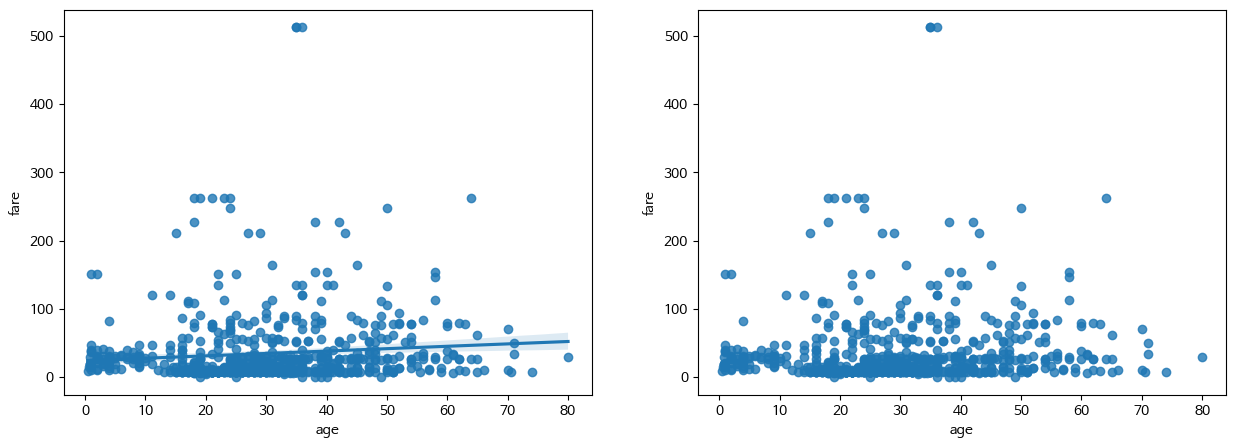

In [57]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 - 선형회귀
sns.regplot(x='age', y='fare', data=titanic, ax=ax1)
sns.regplot(x='age', y='fare', data=titanic, ax=ax2,
            fit_reg=False)  # 회귀선 미표시
plt.show()

In [ ]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
#distplot
sns.distplot(titanic['fare'], ax=ax1)
#kdeplot
sns.kdeplot(x ='fare', data=titanic, ax=ax2)
# histplot
sns.histplot(x ='fare', data=titanic, ax=ax3)
ax1.set_title("titanic fare - distplot")
ax2.set_title("titanic fare - kdeplot")
ax3.set_title("titanic fare - histplot")
plt.show()

In [ ]:
# heatmap
table = titanic.pivot_table(index=['sex'], columns=['class'],
                            aggfunc='size')
# 히트맵 그리기
sns.heatmap(table, annot=True,  # 데이터값 표시여부
            fmt ='d', # 포멧형태 정수, f는 실수
            cmap= 'coolwarm', #'YlGnBu', 'viridis'
            linewidth= .5,
            cbar = True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


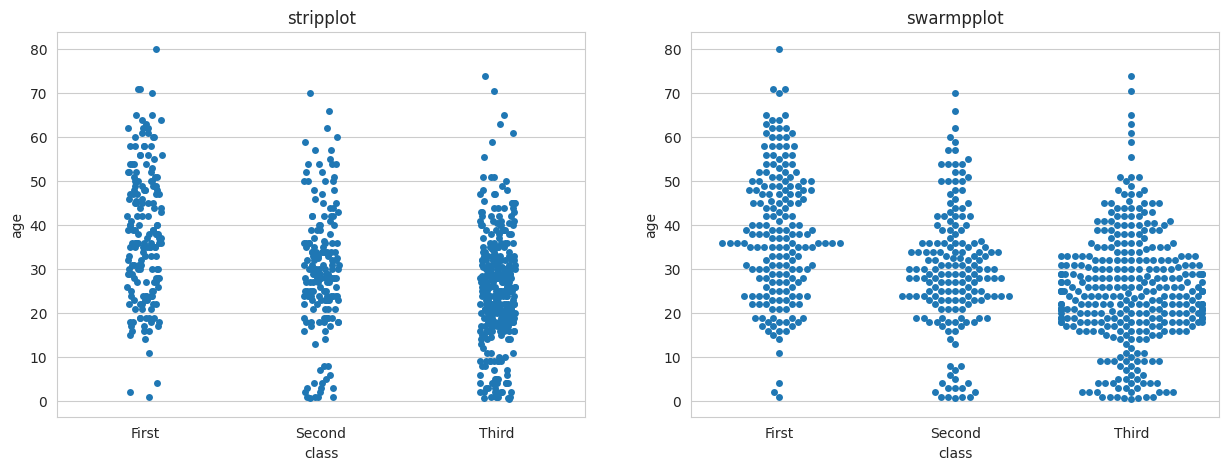

In [72]:
# seaborn의 scatterplot
sns.set_style('whitegrid')
# 그래프 2개 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# 이산형 변수 분포 - 데이터 분산 미고려
sns.stripplot(x='class', #x축
              y='age',   #y축
              data=titanic,
              ax=ax1)
# 이산형 변수 분포 - 데이터 분산 고려(중복X)
sns.swarmplot(x='class', #x축
              y='age',   #y축
              data=titanic,
              ax=ax2)
ax1.set_title('stripplot')
ax2.set_title('swarmpplot')
plt.show()

In [ ]:
titanic

In [ ]:
#seaborn barplot
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
# hue 옵션추가
sns.barplot(x='sex', y='survived', data=titanic, ax=ax2, hue='class')
#hue옵션에 누적출력
sns.barplot(x='sex', y='survived', data=titanic, ax=ax3, hue='class', dodge=False)

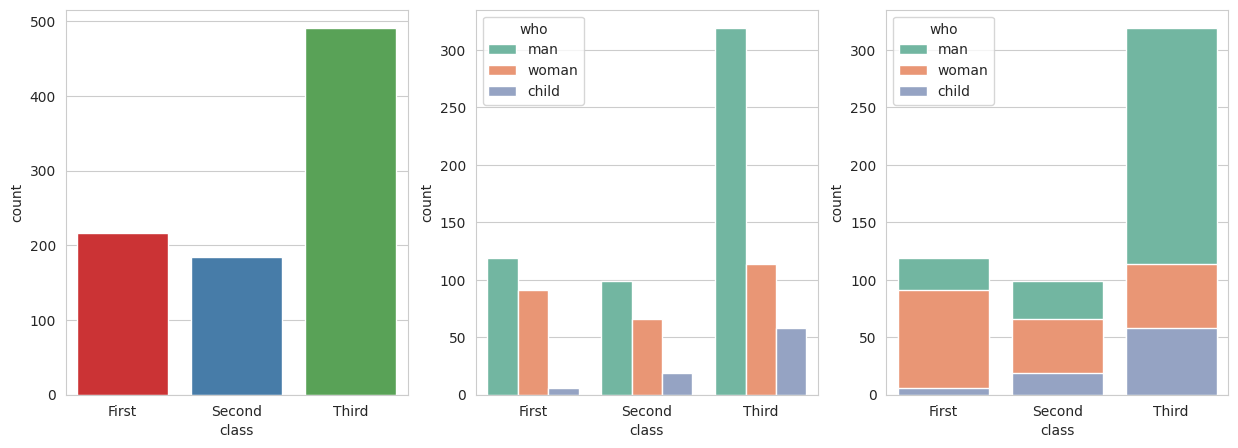

In [84]:
# count plot
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.countplot(x='class', palette='Set1', data=titanic, ax= ax1)
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax= ax2)
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax= ax3, dodge=False)
plt.show()

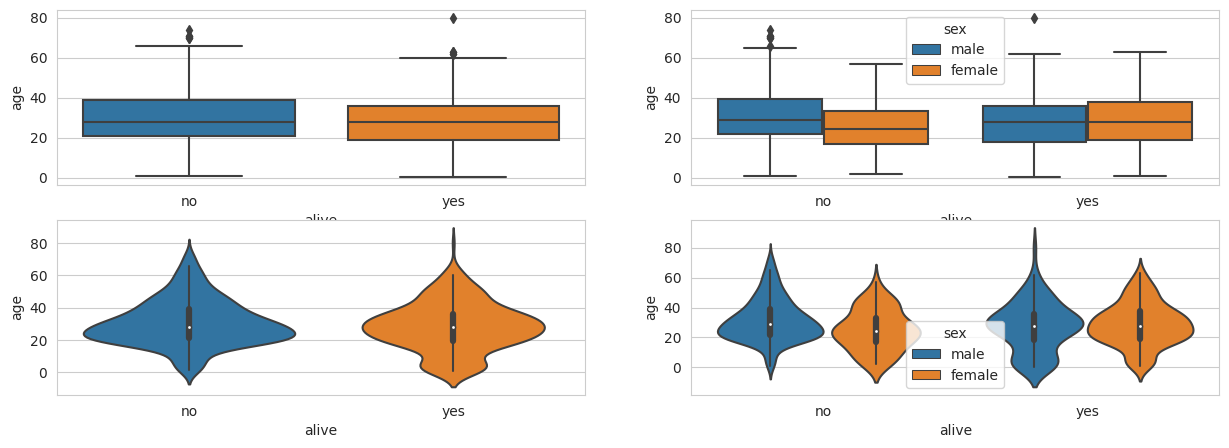

In [85]:
#violin plot
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)
# 바이올린 그래프 hue 변수추가
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)
plt.show()

In [ ]:
# pairpolt
titanic_pair = titanic[['age', 'pclass', 'fare']]
sns.pairplot(titanic_pair )

지도시각화

In [1]:
import folium
# 서울지도
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)
folium.__version__

In [100]:
# 지도를 HTML 파일로 저장
seoul_map.save('seoul.html')

In [ ]:
seoul_map2 = folium.Map(location=[37.55, 126.98], zoom_start=15, tiles='cartodb positron')
seoul_map2

In [ ]:
seoul_map3 = folium.Map(location=[37.55, 126.98], zoom_start=10, tiles='CartoDB dark_matter')
seoul_map3

In [ ]:
seoul_map4 = folium.Map(location=[37.55, 126.98], zoom_start=10, tiles='OpenStreetMap') #기본값
seoul_map4

In [32]:
# 서울대학교 위치정보를 Marker로 표시
import pandas as pd
df = pd.read_excel('서울지역 대학교 위치.xlsx', engine='openpyxl')
#서울지도 만들기
seoul_map3 = folium.Map(location=[37.55, 126.98], zoom_start=12, tiles='OpenStreetMap')
# 대학교 위치표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.Marker([lat, lng], popup=name).add_to(seoul_map3)
seoul_map3

In [ ]:
# 마커를 동그라미 모양으로 표시
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12, tiles='OpenStreetMap')
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat, lng],
                      radius=10,               # 원의 반지름 px
                      color= 'brown',          # 원의색
                      fill = True,             # 원안쪽을 채울지 말지 결정
                      fill_color='coral',      #원의안쪽 색
                      fill_opacity = 0.7,      # 투명
                      popup=name               #마우스를 가져가면 이름을 팝업로 보여줌
                      ).add_to(seoul_map)

seoul_map.save('seoul_colleages.html')

In [39]:
seoul_map

In [40]:
# Choropleth 클래스로 단계구분도 표시하기
import json

In [42]:
# 경기도 인구변화 데이터를 불러와서 데이터 프레임으로 변환
df = pd.read_excel('경기도인구데이터.xlsx',
                   index_col='구분',
                   engine='openpyxl')
df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [43]:
# 경기도 시군구 경계정보를 가진 geo-json 파일 불러오기
try :
  geo_data = json.load(open('경기도행정구역경계.json', encoding='utf-8'))
except:
  geo_data = json.load(open('경기도행정구역경계.json', encoding='utf-8-sig'))

In [45]:
# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502, 126.982], zoom_start=9)

In [52]:
year = 2017
folium.Choropleth(geo_data=geo_data, # 지도경계를 표시
                  data = df[year],   # 표시하고자하는 데이터
                  columns = [df.index, df[year]], # 열지정
                  fill_color='YlOrRd',    # 단계구분도 색범위 Yl은 노란색, Or는 오렌지 ,Rd 레드
                  fill_opacity = 0.7,     # 단계구분도 지역별 색 투명도
                  line_opacity = 0.3,      # 경계선 투명도
                  threshold_scale = [10000, 100000, 300000, 500000, 700000],
                  key_on='feature.properties.name'
                  ).add_to(g_map)

In [53]:
g_map